# Logistic Regression Continued

Recall that our setup is that we have independent variables $x_i\in\mathbb{R}^n$ for $i=1,\ldots,N$, and our dependent variable $y_i$ is either 0 or 1. We are going to interpret $y_i$'s as the logarithm of an [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

An odds ratio is related to the concept of a probability. But instead of counting relative frequency of an event happening, we count the frequencies of one event happening against that event not happening. For example, if we have an unbiased coin, while the probability of getting tails is 50%, the odds of getting tails is 1.

Odds is a better measure because it can be anywhere between 0 to $\infty$ and have better distribution. However, logarithm of odds is even better because it can be anywhere between $-\infty$ to $\infty$. So, if

$$ y = log\left(\frac{p}{1-p}\right) $$

Then 

$$ p = \frac{e^y}{1+e^y} = \frac{1}{1+e^{-y}} $$

Hence the use of logistic function in logistic regression.

## An example (Olivetti Faces)


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import tensorflow as tf
import tensorflow_datasets as tfds

from imblearn.over_sampling import SMOTE 
from collections import Counter

from statsmodels.formula.api import logit

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
faces = fetch_olivetti_faces(data_home='/home/kaygun/local/data/scikit_learn_data/')

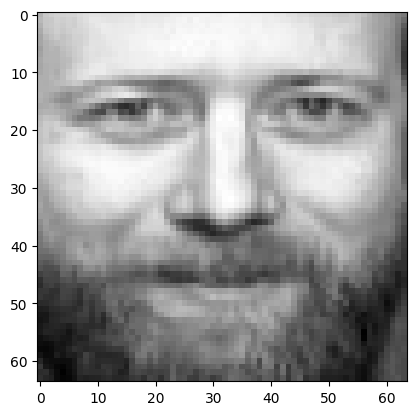

In [3]:
m = np.random.randint(400)
img = faces.data[m,:].reshape((64,64))
plt.imshow(img,cmap='gray')

In [4]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
encoder = LabelBinarizer()
ys = encoder.fit_transform(faces.target)
ys.shape

(400, 40)

In [6]:
X = faces.images.reshape(400,64*64)
X.shape

(400, 4096)

In [7]:
def experiment(X,y, N=1500, solver='lbfgs',multi='auto'):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = LogisticRegression(max_iter=N, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [8]:
experiment(X,ys[:,0])

array([[95,  0],
       [ 1,  4]])

In [10]:
sampler = SMOTE()
sampler.fit(X,ys[:,0])
X_balanced, y_balanced = sampler.fit_resample(X,ys[:,0])
Counter(y_balanced)

Counter({1: 390, 0: 390})

In [11]:
experiment(X_balanced,y_balanced)

array([[98,  0],
       [ 0, 97]])

## Another Example (Forest Cover Type)

We are going to use [this dataset](https://www.kaggle.com/competitions/forest-cover-type-kernels-only/data) from Kaggle. The aim is using cartographic variables to classify forest categories. I already downloaded and unzipped the files for you:


In [12]:
forest_train = pd.read_csv('./data/forest_cover_train.csv')
forest_train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [13]:
forest_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
X_train = forest_train.iloc[:,:55]

In [15]:
encoder = LabelBinarizer()
y_train = encoder.fit_transform(forest_train.iloc[:,55])
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [16]:
experiment(X_train,y_train[:,6],N=2000,solver='liblinear')

array([[3148,   93],
       [  81,  458]])

In [17]:
y_train = forest_train.iloc[:,55]
experiment(X_train,y_train,N=2000,multi='ovr')

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[278,  66,   0,   0,  53,   0, 119],
       [157, 225,  18,   1, 119,  16,  18],
       [  1,   6, 241, 101,  38, 206,   0],
       [  0,   0,  42, 440,   2,  67,   0],
       [ 29,  95,  24,   0, 338,  20,   2],
       [ 14,  40,  70,  65,  25, 309,   0],
       [ 48,  16,   0,   0,  10,   0, 461]])

## Another Example (MNIST)



2022-10-30 16:19:03.668918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kaygun/local/lib
2022-10-30 16:19:03.668953: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 16:19:03.668976: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anarres): /proc/driver/nvidia/version does not exist
2022-10-30 16:19:03.671475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 16:19:03.938077: W tensorflow/core/kernels/data/cache_dataset_o

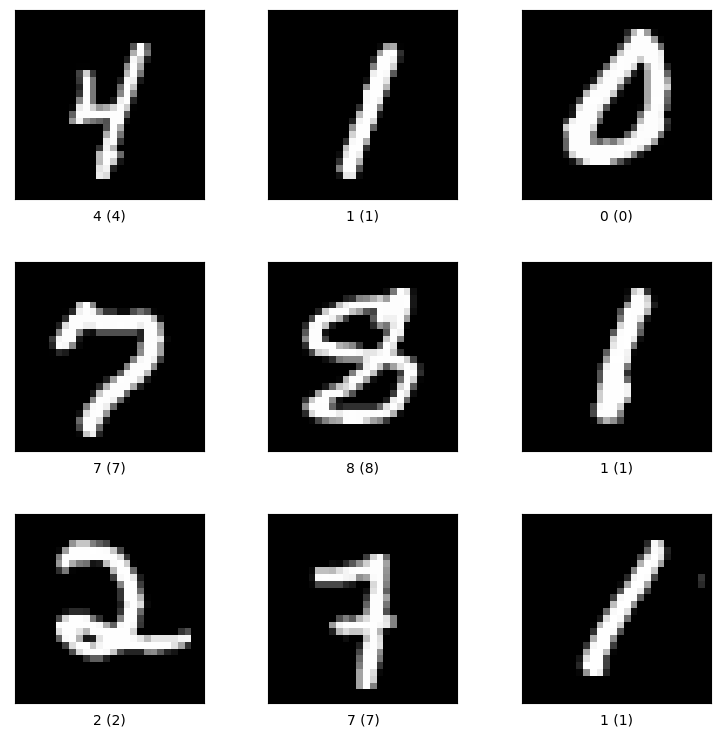

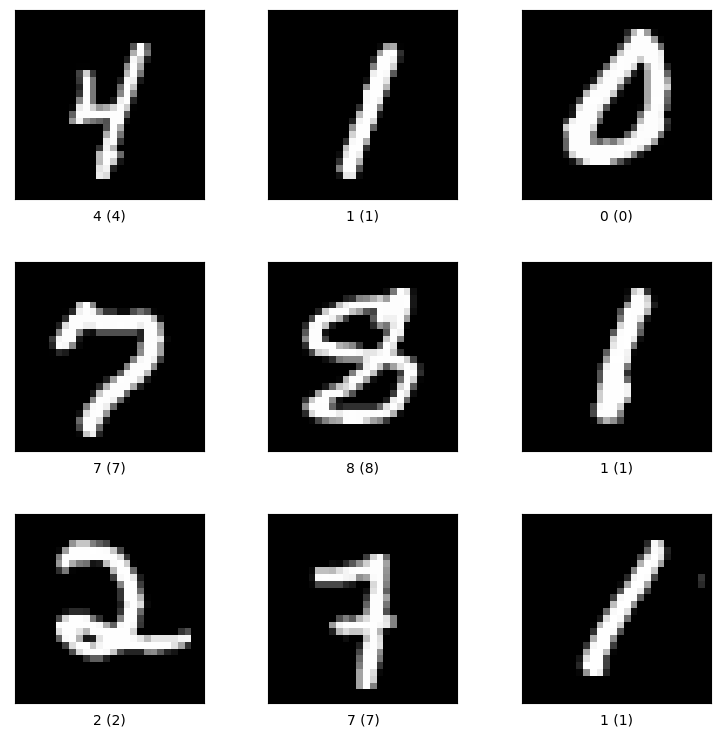

In [18]:
(train, test), info = tfds.load('mnist', split=['train','test'], data_dir='/home/kaygun/local/data/tensorflow_datasets/', with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

In [19]:
def tfGetData(df,N):
    X_train = []
    y_train = []
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((28*28)))
        y_train.append(u['label'].numpy())
    return X_train,y_train

In [20]:
X_train,y_train = tfGetData(train,2000)
X_test,y_test = tfGetData(test,1000)

model = LogisticRegression(max_iter=2000,solver='liblinear',multi_class='ovr')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

2022-10-30 16:19:08.537616: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-10-30 16:19:08.719245: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


array([[105,   0,   1,   0,   0,   0,   0,   0,   2,   0],
       [  0, 120,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,  94,   4,   1,   1,   2,   2,   9,   0],
       [  0,   0,   3,  78,   0,   3,   0,   1,   1,   1],
       [  0,   0,   0,   1,  74,   0,   0,   0,   3,   7],
       [  2,   2,   1,   7,   0,  68,   1,   0,   7,   1],
       [  1,   1,   1,   0,   0,   2,  98,   0,   0,   0],
       [  0,   1,   6,   2,   1,   0,   0,  88,   1,   6],
       [  6,   1,   1,   3,   1,   3,   2,   2,  76,   4],
       [  2,   1,   0,   2,   3,   1,   0,   3,   2,  75]])

## Another Example



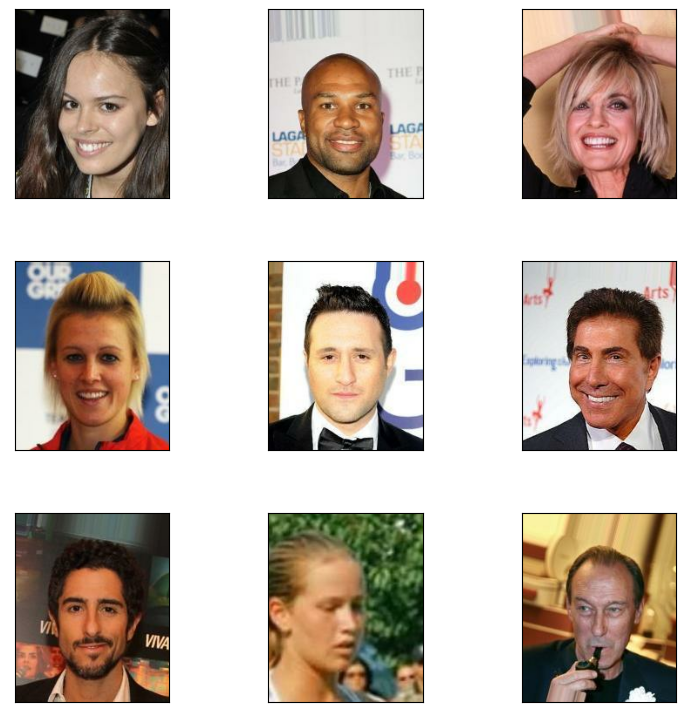

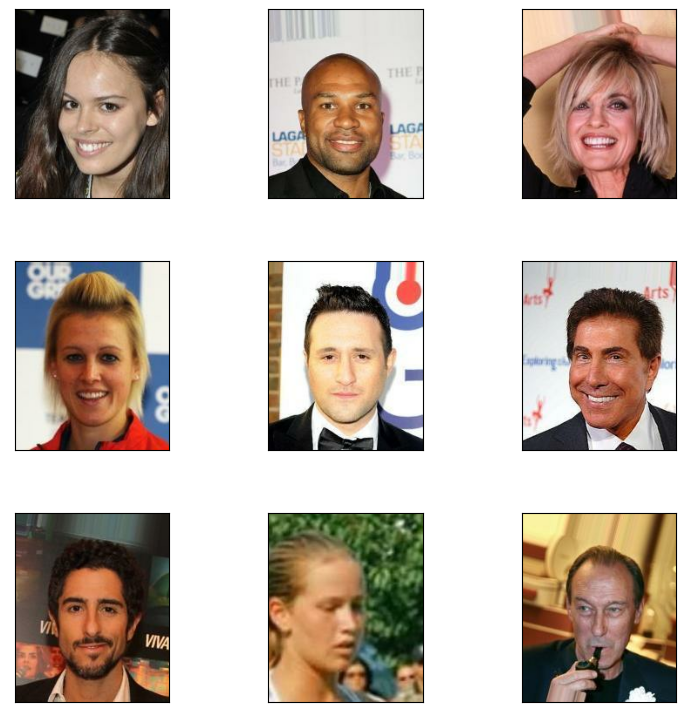

In [21]:
(train, test), info = tfds.load('celeb_a', split=['train','test'], data_dir='/home/kaygun/local/data/tensorflow_datasets/', with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

In [22]:
[x['attributes'] for x in train.take(2)]

[{'5_o_Clock_Shadow': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Arched_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Attractive': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Bags_Under_Eyes': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bald': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bangs': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Big_Lips': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Big_Nose': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Black_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Blond_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=True>,
  'Blurry': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Brown_Hair': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Bushy_Eyebrows': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Chubby': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Double_Chin': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
  'Eyeglasses': <tf.Tensor: shape=(), dtype=b

In [29]:
def tfGetData(df,N,attr):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((218*178*3)))
        y_train.append(fn.get(u['attributes'][attr].numpy(),0))
    return X_train,y_train

In [31]:
X_train,y_train = tfGetData(train,2000,'Male')
X_test,y_test = tfGetData(test,200,'Male')

model = LogisticRegression(max_iter=2000,solver='liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[106,   8],
       [ 14,  72]])

In [32]:
X_train,y_train = tfGetData(train,2000,'Smiling')
X_test,y_test = tfGetData(test,200,'Smiling')

model = LogisticRegression(max_iter=2000,solver='liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[82, 18],
       [20, 80]])

## Another Example

In [58]:
raw, info = tfds.load('bool_q', split='train', data_dir='/home/kaygun/local/data/tensorflow_datasets/', with_info=True, shuffle_files=True)
data = pd.DataFrame(raw.as_numpy_iterator())
data

,answer,passage,question,title
0,False,b'There are four ways an individual can acquir...,b'can i get canadian citizenship if my grandfa...,b'Canadian nationality law'
1,True,b'Star Trek: Discovery is an American televisi...,b'is there a new star trek series coming',b'Star Trek: Discovery'
2,False,"b""The Electric Variable Transmission (EVT) com...",b'is the transmission and motor the same thing',b'Transmission (mechanics)'
3,True,"b'System of a Down, sometimes shortened to Sys...",b'does system of a down have 2 singers',b'System of a Down'
4,False,"b""The Ocklawaha River flows north and joins th...",b'is the st johns river the only river that fl...,b'St. Johns River'
...,...,...,...,...
9422,True,"b""Dr. Henry ``Hank'' Pym is a fictional charac...",b'are ant man and giant man the same',b'Hank Pym'
9423,False,b'The Hunger Games: Mockingjay -- Part 2 is a ...,b'is there another hunger games after mockingj...,b'The Hunger Games: Mockingjay \xe2\x80\x93 Pa...
9424,False,b'Toe walking refers to a condition where a pe...,b'is it normal to walk on your tiptoes',b'Toe walking'
9425,True,"b""Nevada is a ``shall issue'' state for concea...",b'do you need a permit to conceal carry in nev...,b'Gun laws in Nevada'


In [89]:
tmp = list(data['passage'])
tmp.extend(data['question'])
tmp.extend(data['title'])
sentences = [re.sub(r'[^a-zA-Z\ ]','',x.decode('utf8')) for x in tmp]

In [90]:
vc = CountVectorizer(lowercase=True)
vc.fit(sentences)

CountVectorizer()

In [92]:
vc.fit_transform(data['question'])

<9427x9003 sparse matrix of type '<class 'numpy.int64'>'
	with 74611 stored elements in Compressed Sparse Row format>